## Figure 1 (Journal of Climate submission; Molina et al.)

Fig.1. Temporal evolution of AMOC (a) and PMOC (b) for the CESM1 control, Global and Pacific experiments, and the Pacific Salt experiment, as indicated in the legend. AMOC and PMOC are defined as the maximum of the Atlantic and Pacific meridional streamfunction (Sv; 10$^{6}$ m$^{3}$ s$^{−1}$) below a 500-meter depth, respectively.

**Figure by: Maria J. Molina, NCAR**

From Aixue: 
>Here is the AMOC/PMOC data. The variable name is mocall. 
It has 3 dimensions: 6, 803, 2. 
6 represent 6 cases: G02, P02, G04, P04, Psalt, control; (double check this with Aixue)
803 represents time, 803 years; 
2 represents PMOC and AMOC.

In [1]:
# Imports
import xarray as xr
import matplotlib.pyplot as plt
from config import directory_figs, directory_data
from scipy.ndimage import gaussian_filter

In [2]:
# control data from Aixue
ds = xr.open_dataset(f'{directory_data}moc_data_FWSAL_12042019_con.nc')

In [3]:
# eagerly load data

amoc_g02sv = gaussian_filter(ds.isel(ncl0=0, ncl2=1)['mocall'], sigma=1.5)
amoc_p04sv = gaussian_filter(ds.isel(ncl0=1, ncl2=1)['mocall'], sigma=1.5)
amoc_g04sv = gaussian_filter(ds.isel(ncl0=2, ncl2=1)['mocall'], sigma=1.5)
amoc_p02sv = gaussian_filter(ds.isel(ncl0=3, ncl2=1)['mocall'], sigma=1.5)
amoc_psalt = gaussian_filter(ds.isel(ncl0=4, ncl2=1)['mocall'], sigma=1.5)
amoc_cntrl = gaussian_filter(ds.isel(ncl0=5, ncl2=1)['mocall'], sigma=1.5)

pmoc_g02sv = gaussian_filter(ds.isel(ncl0=0, ncl2=0)['mocall'], sigma=1.5)
pmoc_p04sv = gaussian_filter(ds.isel(ncl0=1, ncl2=0)['mocall'], sigma=1.5)
pmoc_g04sv = gaussian_filter(ds.isel(ncl0=2, ncl2=0)['mocall'], sigma=1.5)
pmoc_p02sv = gaussian_filter(ds.isel(ncl0=3, ncl2=0)['mocall'], sigma=1.5)
pmoc_psalt = gaussian_filter(ds.isel(ncl0=4, ncl2=0)['mocall'], sigma=1.5)
pmoc_cntrl = gaussian_filter(ds.isel(ncl0=5, ncl2=0)['mocall'], sigma=1.5)

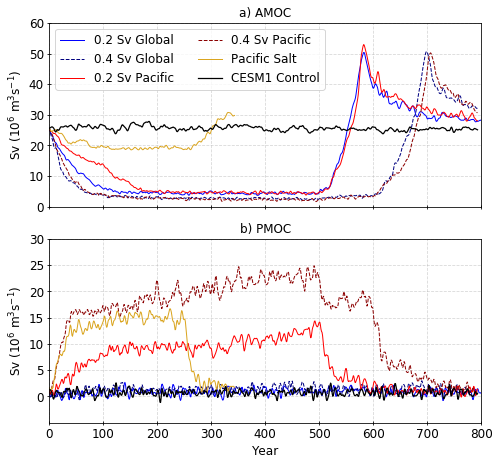

In [4]:
### create figure time series

fig = plt.figure(figsize=(6,6))

###

ax1 = plt.axes([0., 0.5, 1., 0.425])
ax1.set_title('a) AMOC', fontsize=12)

l1, = ax1.plot(amoc_g02sv, lw=1.0, c='b', ls='-')
l2, = ax1.plot(amoc_g04sv, lw=1.0, c='navy', ls='--')
l3, = ax1.plot(amoc_p02sv, lw=1.0, c='red', ls='-') 
l4, = ax1.plot(amoc_p04sv, lw=1.0, c='darkred', ls='--') 
l5, = ax1.plot(amoc_psalt, lw=1.0, c='goldenrod', ls='-') 
l6, = ax1.plot(amoc_cntrl, lw=1.25, c='k', ls='-') 

ax1.margins(x=0)
ax1.set_ylim([0,60])
ax1.set_xlim([0,800])
ax1.grid(ls='--', alpha=0.5)
ax1.tick_params(axis='both', direction='inout', labelsize=12, 
                labelbottom=False, bottom=True,
                labelleft=True, left=True)
ax1.set_ylabel('Sv (10$^{6}$ m$^{3}$s$^{-1}$)', fontsize=12)

ax1.legend([l1,l2,l3,l4,l5,l6],
           ['0.2 Sv Global',
            '0.4 Sv Global',
            '0.2 Sv Pacific',
            '0.4 Sv Pacific',
            'Pacific Salt',
            'CESM1 Control'], ncol=2, loc=2, fontsize=12)

###

ax2 = plt.axes([0., 0., 1., 0.425])
ax2.set_title('b) PMOC', fontsize=12)

ax2.plot(pmoc_g02sv, lw=1.0, c='b', ls='-')
ax2.plot(pmoc_g04sv, lw=1.0, c='navy', ls='--')
ax2.plot(pmoc_p02sv, lw=1.0, c='red', ls='-') 
ax2.plot(pmoc_p04sv, lw=1.0, c='darkred', ls='--') 
ax2.plot(pmoc_psalt, lw=1.0, c='goldenrod', ls='-') 
ax2.plot(pmoc_cntrl, lw=1.25, c='k', ls='-') 

ax2.margins(x=0)
ax2.set_ylim([-5,30])
ax2.set_xlim([0,800])
ax2.grid(ls='--', alpha=0.5)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_yticks([0,5,10,15,20,25,30])
ax2.tick_params(axis='both', direction='inout', labelsize=12, 
                labelbottom=True, bottom=True,
                labelleft=True, left=True)
ax2.set_ylabel('Sv (10$^{6}$ m$^{3}$s$^{-1}$)', fontsize=12)

##

plt.savefig(f'{directory_figs}amocenso_fig1.png', bbox_inches='tight', dpi=200)
plt.savefig(f'{directory_figs}amocenso_fig1.pdf', bbox_inches='tight', dpi=500)
plt.show()

###